In [1]:
import pandas as pd
import numpy as np

sizes = [100, 500, 1000]

data = []
for size in sizes:
    with open(f"./vary_risk_group_size_res/size_{size}_eps.log") as f:
        lines = f.readlines()
        for line in lines:
            eps_res = [size]
            split = line.split(", ")
            for eps in split:
                if eps == "None":
                    eps_res.append(np.nan)
                else:
                    eps_res.append(float(eps))
            data.append(eps_res)

df = pd.DataFrame(data=data, columns=["size", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,size,Q1,Q2,Q3,Q4,Q5
0,100,1.0,2.0,0.900,10.0,10.0
1,100,3.0,3.0,0.600,4.0,3.0
2,100,3.0,3.0,1.000,9.0,10.0
3,100,1.0,1.0,0.800,6.0,7.0
4,100,3.0,2.0,0.050,10.0,10.0
5,100,0.9,2.0,1.000,10.0,9.0
6,100,1.0,2.0,0.070,9.0,5.0
7,100,1.0,2.0,0.600,9.0,10.0
8,100,4.0,1.0,0.100,10.0,10.0
9,100,2.0,1.0,1.000,10.0,7.0


In [2]:
df = df.melt(id_vars="size", var_name="query", value_name="epsilon")
df

,size,query,epsilon
0,100,Q1,1.0
1,100,Q1,3.0
2,100,Q1,3.0
3,100,Q1,1.0
4,100,Q1,3.0
...,...,...,...
145,1000,Q5,10.0
146,1000,Q5,9.0
147,1000,Q5,9.0
148,1000,Q5,10.0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.6)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

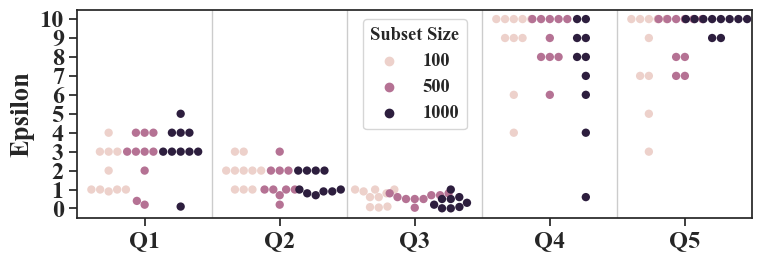

In [7]:
plt.rcParams["figure.figsize"] = [8, 3]

g = sns.swarmplot(data=df, x="query", y="epsilon", hue="size", dodge=True, size=6)
_ = g.set(xlabel=None, ylabel="Epsilon")
_ = g.set_yticks([i for i in range(0, 11)])

cords = [0.5, 1.5, 2.5, 3.5, 4.5]
for x in cords:
    plt.axvline(x=x, color="black", alpha=0.2, linewidth=1)

plt.legend(fontsize='x-small', title_fontsize='x-small')
g.legend_.set_title("Subset Size")
plt.tight_layout()
plt.savefig("figures/vary_risk_group_size_res.pdf", bbox_inches = 'tight', pad_inches = 0.05)
plt.show()
plt.close()